In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Neighborhood Coordinates.csv")

In [3]:
df.head()

,Unnamed: 0,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,0,M3A,North York,Parkwoods,43.753259,-79.329656
1,1,M4A,North York,Victoria Village,43.725882,-79.315572
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


#### Unnamed: 0 column is just the duplicate of index, drop it 

In [4]:
df=df.drop("Unnamed: 0",axis=1)

#### lets plot our data 

In [5]:
import folium
map_osm = folium.Map(location=[df["Latitude"][0],df["Longitude"][0]], zoom_start=10)
df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

#### now , we need to do some feature engineering to get some features out of the neighborhood name

In [6]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [7]:
df["Borough"].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

#### We are going to encode if a rows borough contains York , Toronto or none of them 

In [8]:
df["in_toronto"] = df["Borough"].apply(lambda x: 1 if "Toronto" in x else 0 )

In [9]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,in_toronto
0,M3A,North York,Parkwoods,43.753259,-79.329656,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1


In [10]:
df["in_york"] = df["Borough"].apply(lambda x: 1 if "York" in x else 0)

In [11]:
df["else"] = df["Borough"].apply(lambda x: 1 if not ("York" in x or "Toronto" in x) else 0)

In [12]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,in_toronto,in_york,else
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,1,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,1,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,0,0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,1,0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,0,0


#### Our dataframe is ready.

#### Now , we need to drop every cell that doesn't contain numerical values to be able to use it on a machine learning alghorithm

In [13]:
X = df[["Latitude","Longitude","in_toronto","in_york","else"]]

In [14]:
X

,Latitude,Longitude,in_toronto,in_york,else
0,43.753259,-79.329656,0,1,0
1,43.725882,-79.315572,0,1,0
2,43.654260,-79.360636,1,0,0
3,43.718518,-79.464763,0,1,0
4,43.662301,-79.389494,1,0,0
...,...,...,...,...,...
98,43.653654,-79.506944,0,0,1
99,43.665860,-79.383160,1,0,0
100,43.662744,-79.321558,1,0,0
101,43.636258,-79.498509,0,0,1


#### Now we are ready to cluster

In [15]:
from sklearn.cluster import KMeans

#### Creating a loop to find the best k value

In [16]:
inertias = np.zeros(10)
for k in range (1,10):
    temp_model = KMeans(n_clusters = k)
    temp_model.fit(X)
    inertias[k-1] = temp_model.inertia_

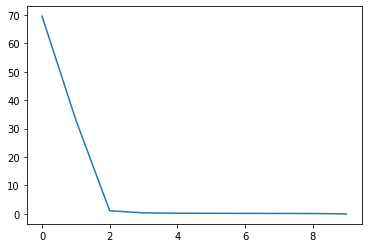

In [17]:
plt.plot(inertias)

#### By the elbow method , we can see that best number k is 3 ( our inertias starts from 0 but our k value starts from 1 )

In [18]:
best_model = KMeans(n_clusters = 3)

In [19]:
best_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
clusters = best_model.predict(X)

In [21]:
df["cluster"] = clusters

In [22]:
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude,in_toronto,in_york,else,cluster
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,1,0,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,1,0,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,0,0,1
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,1,0,0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,0,0,1
...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0,0,1,2
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,0,0,1
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,1,0,0,1
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0,0,1,2


# Visualizing our data with colors and popups

In [23]:
colors = {0:"red",1:"blue",2:"green"}
import folium
map_osm = folium.Map(location=[df["Latitude"][0],df["Longitude"][0]], zoom_start=10)
df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10, fill_color = colors[row["cluster"]] , popup=row['cluster'])
                                             .add_to(map_osm), axis=1)
map_osm